In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"likithakyama","key":"15c0f788e05291978ca615ad6e6d7c8b"}'}

In [2]:
! pip install -q kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d agneev/basedonenglishhandwrittencharactersmodified

 99% 148M/150M [00:01<00:00, 162MB/s]
100% 150M/150M [00:01<00:00, 126MB/s]


In [7]:
!unzip /content/basedonenglishhandwrittencharactersmodified.zip

Archive:  /content/basedonenglishhandwrittencharactersmodified.zip
  inflating: Based-Chars74K-image-dataset-Roman/test/i/1_cap_50.png  
  inflating: Based-Chars74K-image-dataset-Roman/test/i/1_cap_51.png  
  inflating: Based-Chars74K-image-dataset-Roman/test/i/1_cap_52.png  
  inflating: Based-Chars74K-image-dataset-Roman/test/i/1_cap_53.png  
  inflating: Based-Chars74K-image-dataset-Roman/test/i/1_cap_54.png  
  inflating: Based-Chars74K-image-dataset-Roman/test/i/1_cap_55.png  
  inflating: Based-Chars74K-image-dataset-Roman/test/i/1_small_50.png  
  inflating: Based-Chars74K-image-dataset-Roman/test/i/1_small_51.png  
  inflating: Based-Chars74K-image-dataset-Roman/test/i/1_small_52.png  
  inflating: Based-Chars74K-image-dataset-Roman/test/i/1_small_53.png  
  inflating: Based-Chars74K-image-dataset-Roman/test/i/1_small_54.png  
  inflating: Based-Chars74K-image-dataset-Roman/test/i/1_small_55.png  
  inflating: Based-Chars74K-image-dataset-Roman/test/ii/2_cap_50.png  
  inflatin

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [9]:
imgs_path='/content/Based-Chars74K-image-dataset-Roman/train'
img_size=224

In [10]:
class_names=os.listdir(imgs_path)
class_names

['v', 'vi', 'ii', 'x', 'iv', 'vii', 'viii', 'ix', 'iii', 'i']

In [11]:
def img_to_data(path):
    data=[]
    labels=[]

    for folder in sorted(class_names):
      full_path=os.path.join(path,folder)
      label=class_names.index(folder)
      for file_name in sorted(os.listdir(full_path)):
        try :
          file_path=os.path.join(full_path,file_name)
          img=cv2.imread(file_path)
          img=cv2.resize(img,(img_size,img_size),cv2.IMREAD_COLOR)
          data.append(img)
          labels.append(label)
        except Exception as e:
                print(e)

    return np.array(data),np.array(labels)

In [12]:
data,labels=img_to_data(imgs_path)
print(f' images size is {data.shape},labels size is {labels.shape}')

 images size is (822, 224, 224, 3),labels size is (822,)


i


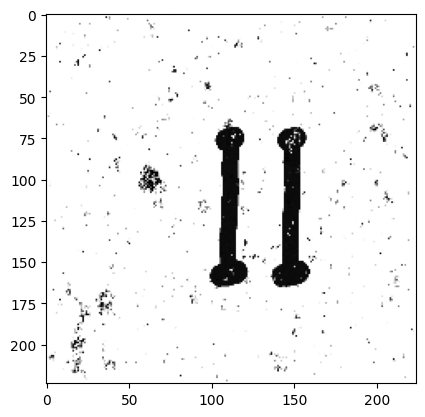

In [13]:
print(class_names[labels[0]])
plt.imshow(data[100])

In [14]:
print(class_names)

['v', 'vi', 'ii', 'x', 'iv', 'vii', 'viii', 'ix', 'iii', 'i']


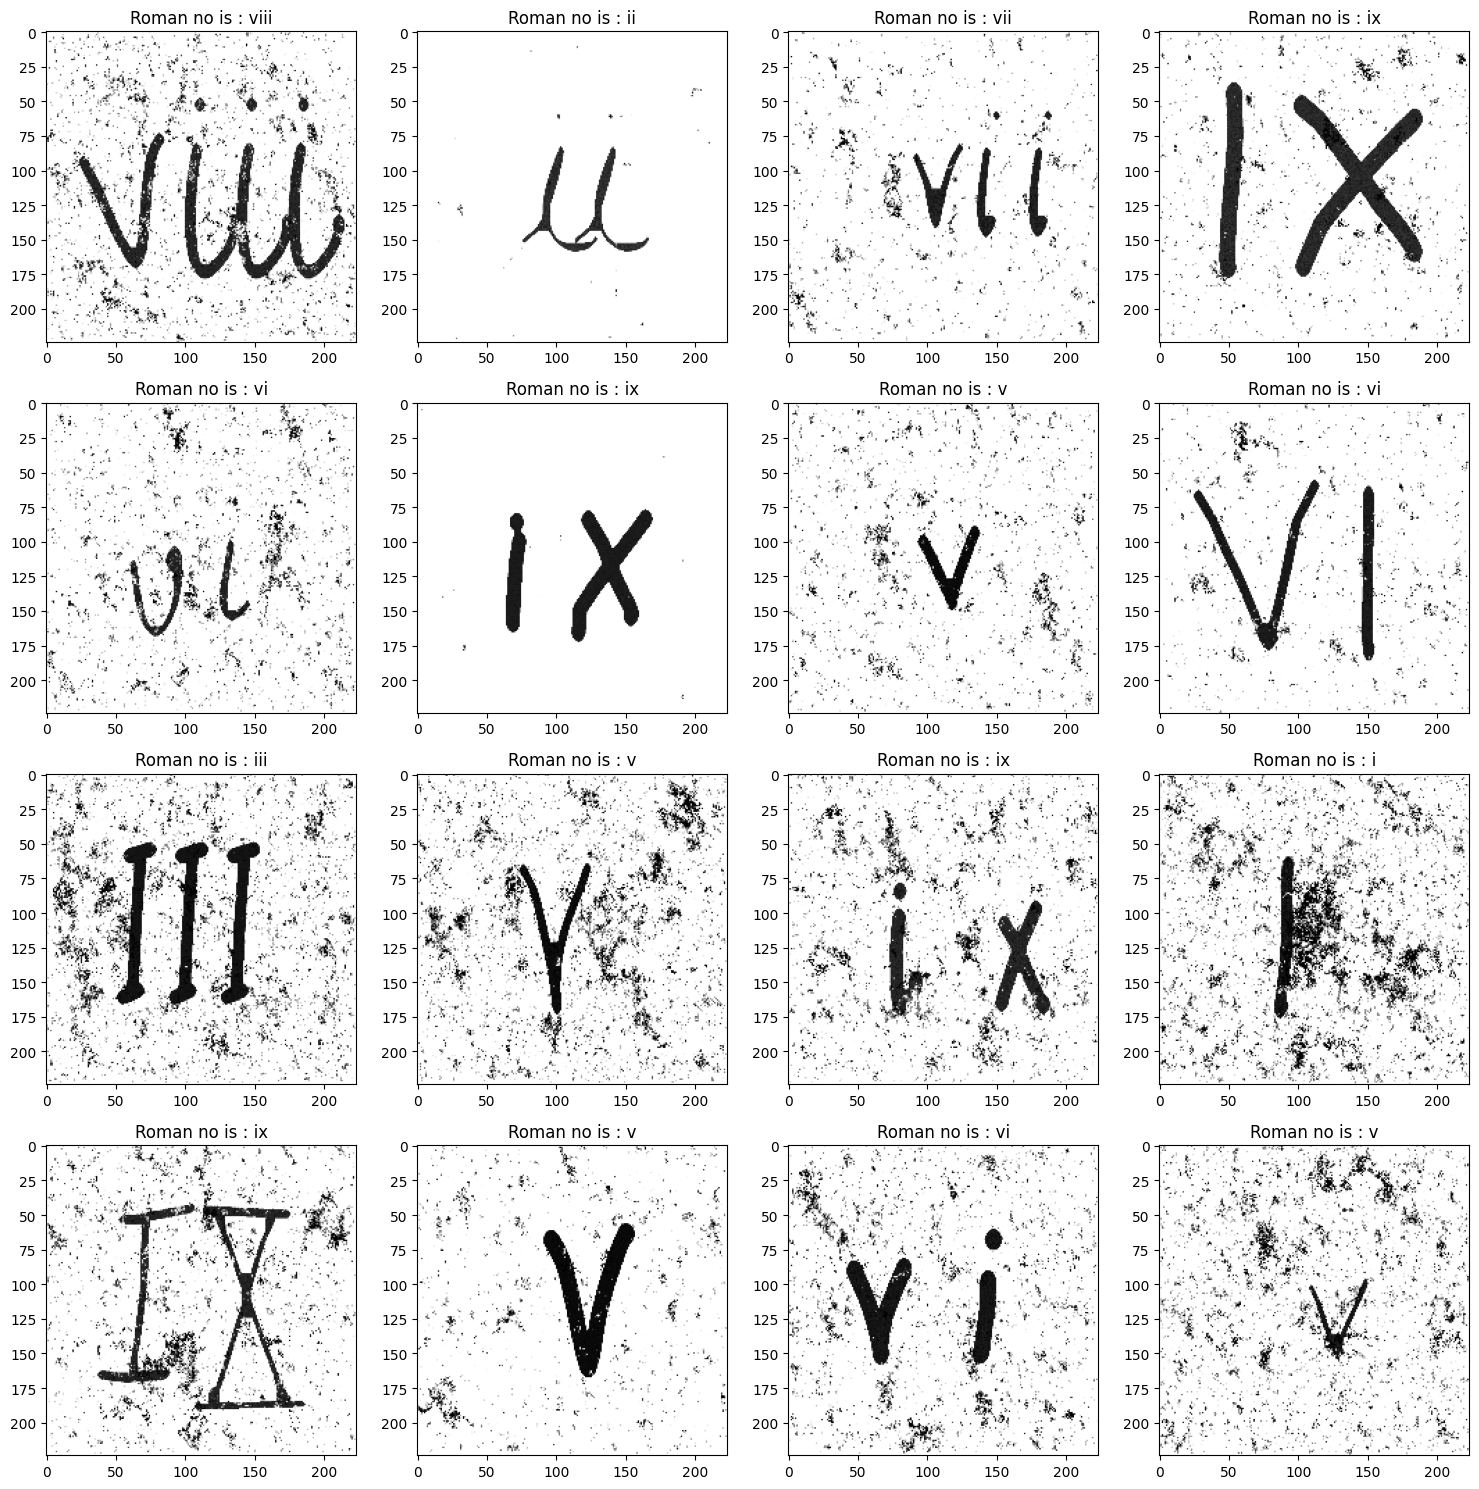

In [15]:
import random
fig,ax=plt.subplots(4,4)
fig.set_size_inches(15,15)
for i in range(4):
    for j in range (4):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l])
        ax[i,j].set_title('Roman no is : '+class_names[labels[l]])

plt.tight_layout()

In [16]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
X = preprocess_input(data)
print(X.shape)
X[0]

(822, 224, 224, 3)


array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.88235295, 0.88235295, 0.88235295],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [17]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(labels)
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(f' X_train size is {X_train.shape}, X_test shape is {X_test.shape}')

 X_train size is (657, 224, 224, 3), X_test shape is (165, 224, 224, 3)


In [19]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
# x_train=preprocess_input(x_train)
vgg=VGG19(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
for layer in vgg.layers[:-1]:
  vgg.trainable=False

model=Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(len(class_names),activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 10)                250890    
                                                                 
Total params: 20275274 (77.34 MB)
Trainable params: 250890 (980.04 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [20]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
learning_rate=ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.0001)
cb_early_stop=EarlyStopping(monitor = 'val_loss', patience = 2)
callbacks_list=[learning_rate,cb_early_stop]

In [21]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=7,batch_size=64,callbacks=[callbacks_list])

Epoch 1/7
11/11 [==============================] - 387s 36s/step - loss: 2.4832 - accuracy: 0.2496 - val_loss: 1.8864 - val_accuracy: 0.3758 - lr: 0.0010
Epoch 2/7
11/11 [==============================] - 391s 36s/step - loss: 0.9629 - accuracy: 0.7002 - val_loss: 0.9304 - val_accuracy: 0.7212 - lr: 0.0010
Epoch 3/7
11/11 [==============================] - 397s 36s/step - loss: 0.5090 - accuracy: 0.8782 - val_loss: 0.6779 - val_accuracy: 0.7939 - lr: 0.0010
Epoch 4/7
11/11 [==============================] - 395s 36s/step - loss: 0.3142 - accuracy: 0.9559 - val_loss: 0.5437 - val_accuracy: 0.8424 - lr: 0.0010
Epoch 5/7
11/11 [==============================] - 393s 36s/step - loss: 0.2552 - accuracy: 0.9619 - val_loss: 0.5636 - val_accuracy: 0.8545 - lr: 0.0010
Epoch 6/7
11/11 [==============================] - 398s 37s/step - loss: 0.1756 - accuracy: 0.9772 - val_loss: 0.4656 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 7/7
11/11 [==============================] - 393s 36s/step - loss: 0.1

Text(0.5, 1.0, 'val accuracy')

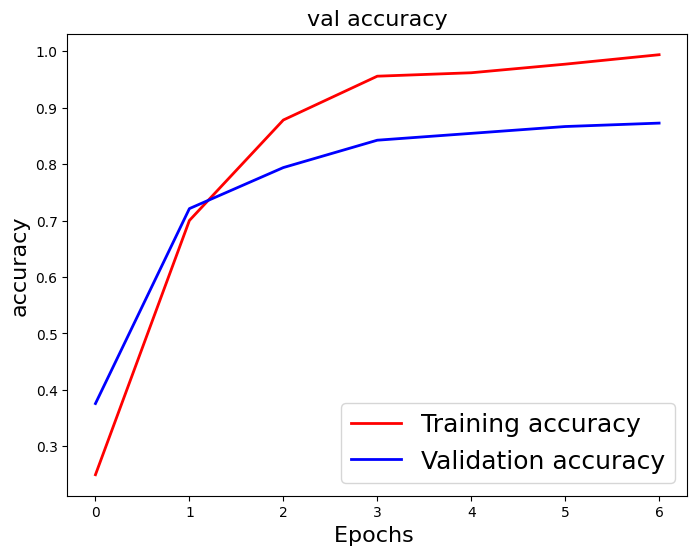

In [22]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [23]:
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_test_labels=np.argmax(y_test,axis=1)

6/6 [==============================] - 79s 13s/step


Accuracy : 87.27272727272727


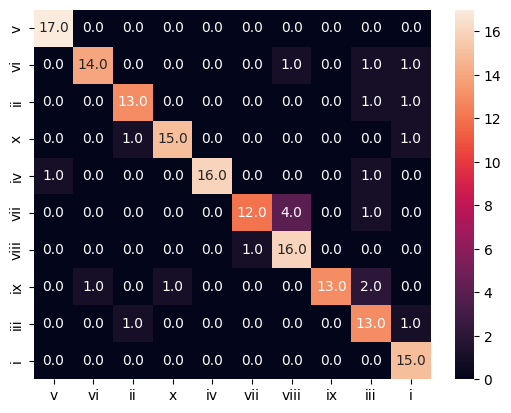

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
# print(confusion_matrix(y_test_labels,y_pred_classes))
sns.heatmap(confusion_matrix(y_test_labels,y_pred_classes),yticklabels=class_names,xticklabels=class_names,annot=True,fmt='.1f') # calculating the confusion matrix
accuracy=accuracy_score(y_test_labels,y_pred_classes)*100 # calculating the accuracy
print(f'Accuracy : {accuracy}')

In [25]:
files.upload() # upload image for test

Saving 20240103_161147.jpg to 20240103_161147.jpg


{'20240103_161147.jpg': b'\xff\xd8\xff\xe1\x04\x82Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\r\x01\x03\x00\x03\x00\x00\x00\x01\x00\x06\x00\x00\x01\x01\x00\x03\x00\x00\x00\x01\x0b\xb8\x00\x00\x01\x0f\x00\x02\x00\x00\x00\x08\x00\x00\x00\xaa\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x012\x00\x02\x00\x00\x00\x14\x00\x00\x00\xb2\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00\xc6\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00\xce\x01\x00\x00\x03\x00\x00\x00\x01\x0f\xa0\x00\x00\x01\x10\x00\x02\x00\x00\x00\t\x00\x00\x00\xd6\x011\x00\x02\x00\x00\x00\x0e\x00\x00\x00\xdf\x02\x13\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\xed\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x00\x00\x00\x00samsung\x002024:01:03 16:11:47\x00\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01SM-M215F\x00M215FXXS3CWK1\x00\x00(\x92\x02\x00\x05\x00\x00\x00\x01\x00\x00\x02\xd3\x90\x00\x00\x02\x00\x00\x00\x05\x00\x00\x02\xdb\xa3\x01\x00\x02\x00\x00\x00\x02?\x00\x00\x00\x92\x04\x00\n\x

(1, 224, 224, 3)

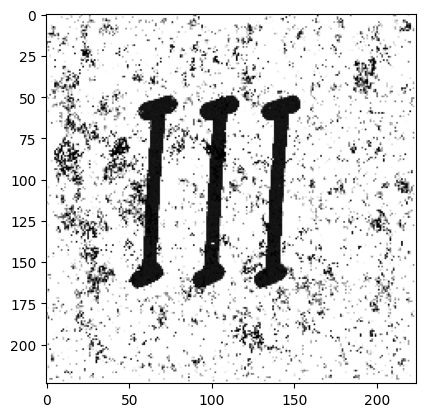

In [26]:
image_name='/content/Based-Chars74K-image-dataset-Roman/train/iii/3_cap_10.png'   # enter image name to test
x1=[]
img_1 = cv2.imread(image_name, cv2.IMREAD_COLOR)
resized_arr_1 = cv2.resize(img_1, (img_size, img_size)) # Reshaping images to preferred size
plt.imshow(resized_arr_1)
x1.append([resized_arr_1])
x1=np.array(x1)
x1 = preprocess_input(x1)
x1 = x1.reshape(-1, img_size, img_size, 3)
x1.shape

1/1 [==============================] - 0s 460ms/step


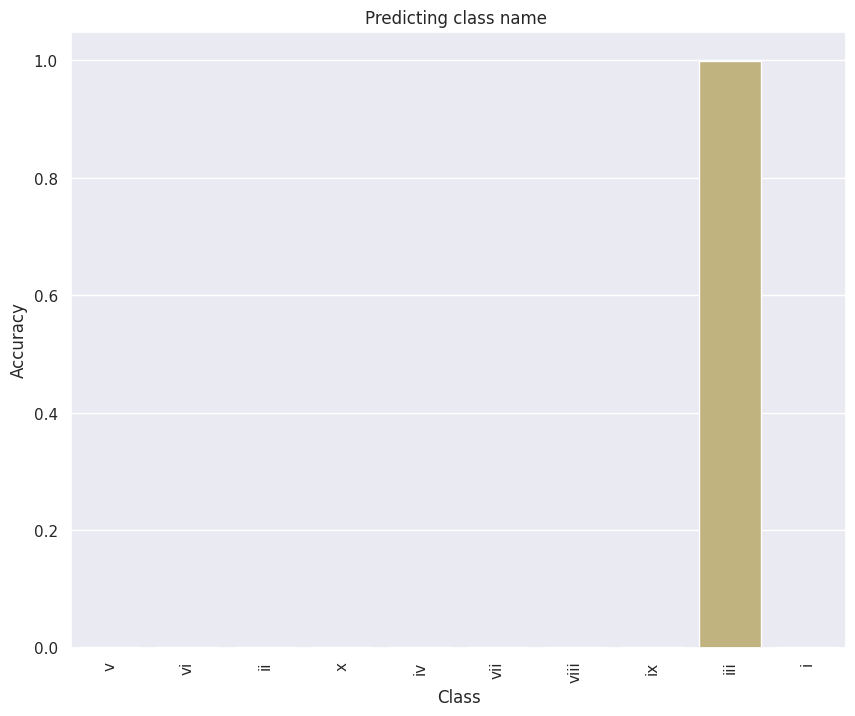

In [27]:
pred=model.predict(x1) # for predicting class
labels_pred=np.argmax(pred,axis=1)
labels2=class_names[labels_pred[0]]
pred_results=pd.DataFrame(data=pred,columns=class_names)
fig=plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
ax=sns.barplot(data=pred_results)
ax.set_xticklabels(class_names,rotation=90)
ax.set_xlabel('Class')
ax.set_ylabel('Accuracy')
ax.set_title('Predicting class name ')
plt.show()